In [1]:
#Import pycaret
from pycaret.anomaly import *
import pandas as pd

In [2]:
df=pd.read_csv('Data1.csv')


In [3]:
#df=pd.read_csv('DatesFixed.csv')
df.POLICY_CODE.duplicated().sum()

1

In [4]:
df=df.drop_duplicates()

In [5]:
df.loc[df.duplicated(), :]

,AGENT_PERSISTENCY,CLAWBACK_COMMISSION,EDUCATION,EXPIRY_DATE,GENDER,INCOME,MARITAL_STATUS,MODE_NAME,POLICY_CODE,PREMIUM_AMOUNT,PREMIUM_FREQUENCY,PREMIUM_STATUS,PRODUCT_CODE,PRODUCT_TYPE,Policy_Age,Policy_holder_Age,SA,SALES_CHANNEL,STATUS_NAME,TERM,TERMINATION_REASON


In [6]:
df=df.drop_duplicates()

In [7]:
df = df.reset_index(drop=True)


In [8]:
df.index.is_unique

True

In [9]:
df = df.sample(frac=1).reset_index(drop=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681456 entries, 0 to 681455
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   AGENT_PERSISTENCY    681456 non-null  float64
 1   CLAWBACK_COMMISSION  272104 non-null  float64
 2   EDUCATION            301886 non-null  object 
 3   EXPIRY_DATE          681456 non-null  object 
 4   GENDER               681456 non-null  object 
 5   INCOME               499072 non-null  float64
 6   MARITAL_STATUS       499195 non-null  object 
 7   MODE_NAME            681456 non-null  object 
 8   POLICY_CODE          681456 non-null  int64  
 9   PREMIUM_AMOUNT       681395 non-null  float64
 10  PREMIUM_FREQUENCY    681456 non-null  object 
 11  PREMIUM_STATUS       681456 non-null  object 
 12  PRODUCT_CODE         659606 non-null  object 
 13  PRODUCT_TYPE         681456 non-null  object 
 14  Policy_Age           681456 non-null  int64  
 15  Policy_holder_Age

In [ ]:
#remove date collumns
# convert the 'Date' column to datetime format
df['TERMINATION_EFFECTIVE_DATE']= pd.to_datetime(df['TERMINATION_EFFECTIVE_DATE'])
df['BIRTHDAY']= pd.to_datetime(df['BIRTHDAY'])
df['DOC']= pd.to_datetime(df['DOC'])


#Etract the age from  birth year
#soucrce: https://stackoverflow.com/questions/2217488/age-from-birthdate-in-python
from datetime import date

def calculate_age(born):
    #today = date.today()
    twenty20 = date(2020, 12, 30)
    return twenty20.year - born.year - ((twenty20.month, twenty20.day) < (born.month, born.day))




#Calculate the policy age

df['Policy_Age'] = df['DOC'].apply(calculate_age)
df['Policy_holder_Age'] = df['BIRTHDAY'].apply(calculate_age)

df = df[df.columns.difference(['DOC', 'BIRTHDAY','TERMINATION_EFFECTIVE_DATE','EXPIRY_DATE'])]


In [11]:
df.head()

,AGENT_PERSISTENCY,CLAWBACK_COMMISSION,EDUCATION,EXPIRY_DATE,GENDER,INCOME,MARITAL_STATUS,MODE_NAME,POLICY_CODE,PREMIUM_AMOUNT,PREMIUM_FREQUENCY,PREMIUM_STATUS,PRODUCT_CODE,PRODUCT_TYPE,Policy_Age,Policy_holder_Age,SA,SALES_CHANNEL,STATUS_NAME,TERM,TERMINATION_REASON
0,99.71,NaN,NaN,8/31/2054,F,76464.0,Married,DDE,4005757330,575.54,Monthly,Regular,PSTA-1,Risk,3,35,1500000.0,Tied,Inforce,36,NaN
1,88.75,-1903.8094,Others,4/30/2041,F,22212.0,Single,ESO(Electronic),4004218027,205.00,Monthly,Regular,ULP1-1,Investment,4,42,0.0,Broker,Terminated,24,Ill Health/Sick Leave
2,74.19,0.0000,Others,4/30/2038,F,138744.0,Married,GSO,4001557538,335.50,Monthly,Regular,ULMG-1,Investment,6,52,0.0,Broker,Terminated,23,Surrender
3,0.00,NaN,NaN,9/9/9999,M,NaN,NaN,Electronic Cash Collection,5001186742,50.00,Monthly,Regular,MOSK-1,Risk,3,39,4000.0,Tied,Terminated,7982,Death
4,93.31,-569.9760,NaN,9/9/9999,M,72000.0,Single,DDE,4002910328,88.00,Monthly,Regular,SCTFP,Risk,5,31,15000.0,Broker,Lapsed,7984,NaN


In [12]:
#Dropt 'Termination reason collumn as it gives away the class'
df.drop(df[df['STATUS_NAME'] == 'Waiting for Validate'].index, inplace = True)

In [13]:
df.shape

(681450, 21)

In [14]:
#Check if the waiting for validate has been removed
df.STATUS_NAME.unique()

array(['Inforce', 'Terminated', 'Lapsed'], dtype=object)

In [ ]:
#Simple count plot for class balance inestigation
import seaborn as sns
ax = sns.countplot(x="STATUS_NAME", data=df)

The above plot shows more policies have been terminated foe the data 2014 to 2020.

Data set currently seats at 600k rows. This might be too expensive for computation.
Maybe sampling the data would help reduce that.


In [15]:
#random sample
df2=df.sample(n=10000,replace="False")
df2.shape

(10000, 21)

In [18]:
df2 = df2.reset_index(drop=True)

In [19]:
df2.index.is_unique

True

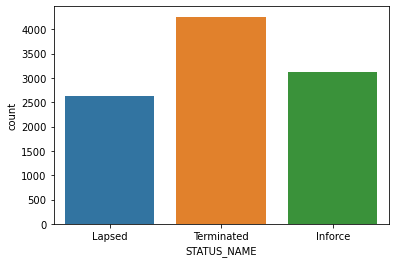

In [20]:
#Check class balance of the sample
#Simple count plot for class balance inestigation
import seaborn as sns
ax = sns.countplot(x="STATUS_NAME", data=df2)

In [21]:
#drop the termination reason
df2=df2.drop(['TERMINATION_REASON'], axis=1)

In [22]:
#Assume Terminated=Lapsed
df2['STATUS_NAME'] = df2['STATUS_NAME'].str.replace('Terminated','Lapsed')

In [23]:
df2.index.is_unique

True

In [24]:
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [AGENT_PERSISTENCY, CLAWBACK_COMMISSION, EDUCATION, EXPIRY_DATE, GENDER, INCOME, MARITAL_STATUS, MODE_NAME, POLICY_CODE, PREMIUM_AMOUNT, PREMIUM_FREQUENCY, PREMIUM_STATUS, PRODUCT_CODE, PRODUCT_TYPE, Policy_Age, Policy_holder_Age, SA, SALES_CHANNEL, STATUS_NAME, TERM, TERMINATION_REASON]
Index: []


Seems reasonable to proceed.

In [25]:
#Set up an experiement
expano=setup(df2,ignore_features=['STATUS_NAME'],
          imputation_type='simple',
          numeric_imputation='mean',categorical_imputation='mode',
          #fix_imbalance=True,
          normalize=True ,  #Rescaling
         # transformation= True,
          #feature_interaction=True,
          #feature_ratio= True,
          #polynomial_degree=2,
          #polynomial_features=True,
          #trigonometry_features=True,
          #bin_numeric_features=['Policy_holder_Age','INCOME']
         
         
         
         
         
         )

,Description,Value
0,session_id,2394
1,Original Data,"(10000, 20)"
2,Missing Values,True
3,Numeric Features,9
4,Categorical Features,10
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(10000, 637)"
9,CPU Jobs,-1


In [38]:
models()

,Name,Reference
ID,,
abod,Angle-base Outlier Detection,pyod.models.abod.ABOD
cluster,Clustering-Based Local Outlier,pyod.models.cblof.CBLOF
cof,Connectivity-Based Local Outlier,pyod.models.cof.COF
iforest,Isolation Forest,pyod.models.iforest.IForest
histogram,Histogram-based Outlier Detection,pyod.models.hbos.HBOS
knn,K-Nearest Neighbors Detector,pyod.models.knn.KNN
lof,Local Outlier Factor,pyod.models.lof.LOF
svm,One-class SVM detector,pyod.models.ocsvm.OCSVM
pca,Principal Component Analysis,pyod.models.pca.PCA


In [39]:
iforest= create_model('histogram')

In [40]:
print(iforest)

HBOS(alpha=0.1, contamination=0.05, n_bins=10, tol=0.5)


In [41]:
results=assign_model(iforest)

In [42]:
results

,AGENT_PERSISTENCY,CLAWBACK_COMMISSION,EDUCATION,EXPIRY_DATE,GENDER,INCOME,MARITAL_STATUS,MODE_NAME,POLICY_CODE,PREMIUM_AMOUNT,...,PRODUCT_CODE,PRODUCT_TYPE,Policy_Age,Policy_holder_Age,SA,SALES_CHANNEL,STATUS_NAME,TERM,Anomaly,Anomaly_Score
0,80.97,-2209.517800,NaN,4/30/2039,F,236541.0,Single,BSO,4001703410,407.86,...,BMKS-1,Risk,6,34,1000000.000,Tied,Lapsed,24,0,-2058.500530
1,0.00,NaN,Others,11/30/2027,M,92028.0,Married,GSO,21046775,182.00,...,ULP1-1,Investment,18,54,0.000,Tied,Lapsed,24,0,-2059.781707
2,0.00,NaN,NaN,9/9/9999,M,NaN,NaN,Electronic Cash Collection,5001397286,115.30,...,NaN,Risk,0,23,15000.000,Tied,Inforce,7979,0,-2073.544494
3,88.12,NaN,Others,10/31/2024,M,218028.0,Single,GSO,4002303258,382.88,...,ULMG-1,Investment,6,36,0.000,Tied,Inforce,9,0,-2065.011600
4,0.00,NaN,Others,1/31/2016,F,108000.0,Other,DDE,30155120,600.00,...,ULK1-1,Investment,17,67,0.000,Broker,Lapsed,12,1,-2042.248563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,90.86,-1173.146700,NaN,9/9/9999,M,98745.0,Single,DDE,4008023476,161.00,...,BMFW-1,Risk,1,37,20000.000,Tied,Lapsed,7979,0,-2074.729548
9996,0.00,-77.157200,Others,9/9/9999,M,27024.0,Single,ESO(Electronic),100740454,253.27,...,BMFW-1,Risk,10,45,17910.785,Broker,Lapsed,7989,0,-2069.322312
9997,0.00,NaN,NaN,9/9/9999,N,NaN,NaN,Electronic Cash Collection,5001245304,50.00,...,MOSK-1,Risk,5,37,4000.000,Tied,Lapsed,7984,0,-2072.219909
9998,82.43,-43.711450,Others,6/30/2036,M,84240.0,Single,GSO,4004366519,353.07,...,ULP1-1,Investment,4,61,0.000,Tied,Lapsed,19,0,-2065.557283


In [43]:
plot_model(iforest,plot='tsne')

In [34]:
X_train=get_config('X')
x_test=df.drop(df.index)
x_test = x_test.reset_index(drop=True)

In [35]:

import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    #class_names=['inforce', 'Lapse'],
    mode='classification'
)

In [37]:

exp = explainer.explain_instance(
    data_row=x_test.iloc[1], 
    predict_fn=iforest.predict_proba
)

exp.show_in_notebook(show_table=True,show_predicted_value=True)

IndexError: single positional indexer is out-of-bounds

In [ ]:
evaluate_model(gbc,)

# Tune Model

In [ ]:
tuned_model=tune_model(gbc)

In [ ]:
exp1 = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=tuned_model.predict_proba
)

exp1.show_in_notebook(show_table=True,show_predicted_value=True)

In [ ]:
#Parameters
plot_model(tuned_model,plot='parameter')

In [ ]:
#roc and auc
plot_model(tuned_model,plot='auc')

In [ ]:
#Discrimination threshold
plot_model(tuned_model,plot='threshold')

In [ ]:
#Precision recall curve
plot_model(tuned_model,plot='pr')

In [ ]:

plot_model(tuned_model,plot='confusion_matrix')

In [ ]:
#Prediction error plot
plot_model(tuned_model,plot='error')

In [ ]:
#class report
plot_model(tuned_model,plot='class_report')

In [ ]:
#boundary plot
plot_model(tuned_model,plot='boundary')

In [ ]:
plot_model(tuned_model,plot='learning')

In [ ]:
plot_model(tuned_model,plot='calibration')

In [ ]:
plot_model(tuned_model,plot='vc')

In [ ]:
plot_model(tuned_model,plot='dimension')

In [ ]:
plot_model(tuned_model,plot='feature')

In [ ]:
plot_model(tuned_model,plot='feature_all')

In [ ]:
plot_model(tuned_model,plot='lift')

In [ ]:
plot_model(tuned_model,plot='gain')

In [ ]:
plot_model(tuned_model,plot='manifold')

# Bag Model

In [ ]:
bagged_gbt = ensemble_model(tuned_model)